In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tabulate import tabulate
import statistics as st
import math
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter("ignore")

### Stochastic Discount Factor

Suppose that consumption growth has lognormal distribution with the possibility of rare disasters:
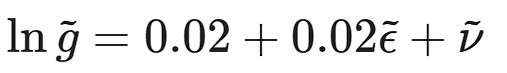


Here ε is a standard normal random variable, while ν is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).n.

Simulate ε with (at least) 10000 random draws from standard normal distribution, and simulate ν with (at least) 10000 random draws from standard uniform distribution.

In [2]:
epsilon_list = []
nu_list = []
consumption_growth_list = []

for i in range(10000):
    epsilon = np.random.standard_normal()
    prob_nu = np.random.uniform(0,1)
    if prob_nu < 0.017:
        nu = np.log(0.65)
    else:
        nu = 0
    
    consumption_growth = np.exp(0.02 + 0.02 * epsilon + nu)
    
    epsilon_list.append(epsilon)
    nu_list.append(nu)
    consumption_growth_list.append(consumption_growth)

Text(0.5, 1.0, 'Epsilon')

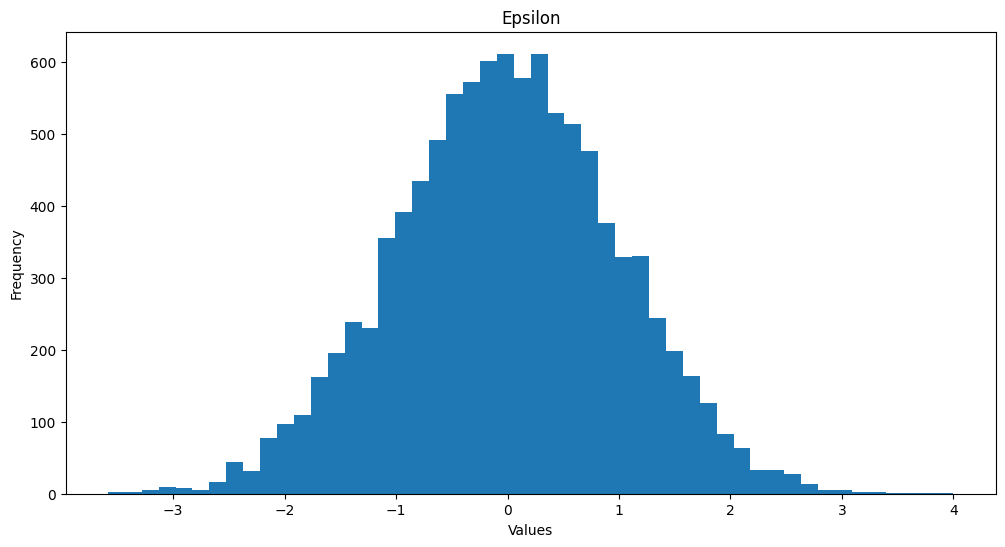

In [3]:
plt.figure(figsize = (12, 6))
plt.hist(epsilon_list,bins = 50)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Epsilon")

In [4]:
unique, frequency = np.unique(nu_list,return_counts = True)
table = zip(unique, frequency)
col_names = ["Value of Nu","Frequency"]
print(tabulate(table, headers = col_names))

  Value of Nu    Frequency
-------------  -----------
    -0.430783          175
     0                9825


Text(0.5, 1.0, 'Consumption Growth')

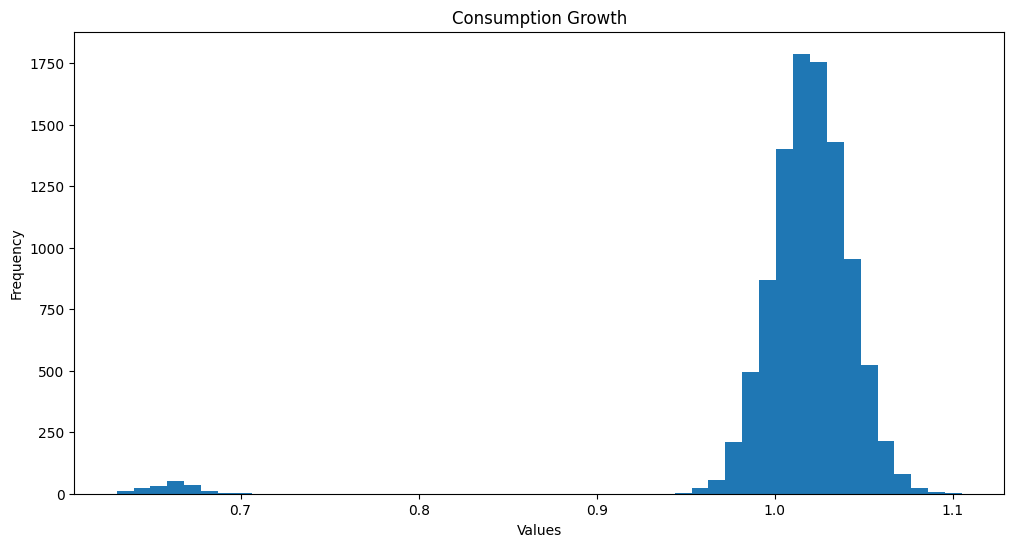

In [5]:
plt.figure(figsize = (12, 6))
plt.hist(consumption_growth_list,bins = 50)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Consumption Growth")

Use the simulated distribution of consumption growth to find the simulated distribution of the pricing kernel for power utility:


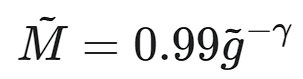


Repeat this process for values of γ in the range from 1 to 4, in increments of 0.1 (or less). (Note that you can reuse the same simulated distribution of consumption growth for all values of γ). 

Calculate μM and σM for each value of γ, and plot σM/μM (on the vertical axis) vs γ (on the horizontal aresult.

In [6]:
gamma = np.arange(0, 4.05, 0.05)

sigma = []
mu = []
gamma_list = []
sigma_over_mu = []

for i in gamma:
    pricing_kernel = 0.99 * (consumption_growth_list ** -i)
    mean = np.mean(pricing_kernel)
    std = np.std(pricing_kernel)
    ratio = std/mean
    
    sigma.append(std)
    mu.append(mean)
    gamma_list.append(i)
    sigma_over_mu.append(ratio)

table = zip(gamma_list, mu, sigma,sigma_over_mu)
col_names = ["Gamma", "Mu of M","Sigma of M", "Sigma/Mu"]
print(tabulate(table, headers = col_names))

  Gamma    Mu of M    Sigma of M    Sigma/Mu
-------  ---------  ------------  ----------
   0      0.99        0           0
   0.05   0.989396    0.0030034   0.00303559
   0.1    0.988802    0.00605972  0.00612835
   0.15   0.988217    0.00917021  0.00927955
   0.2    0.987642    0.0123361   0.0124905
   0.25   0.987077    0.0155588   0.0157625
   0.3    0.986522    0.0188394   0.0190968
   0.35   0.985978    0.0221795   0.0224949
   0.4    0.985444    0.0255803   0.0259581
   0.45   0.98492     0.0290432   0.0294879
   0.5    0.984408    0.0325697   0.0330856
   0.55   0.983906    0.0361612   0.0367527
   0.6    0.983415    0.0398193   0.0404908
   0.65   0.982936    0.0435454   0.0443013
   0.7    0.982469    0.047341    0.0481858
   0.75   0.982013    0.0512079   0.0521458
   0.8    0.981569    0.0551475   0.056183
   0.85   0.981138    0.0591615   0.0602989
   0.9    0.980719    0.0632517   0.0644952
   0.95   0.980312    0.0674196   0.0687736
   1      0.979918    0.0716672   0.

Text(0.5, 1.0, 'Pricing Kernel')

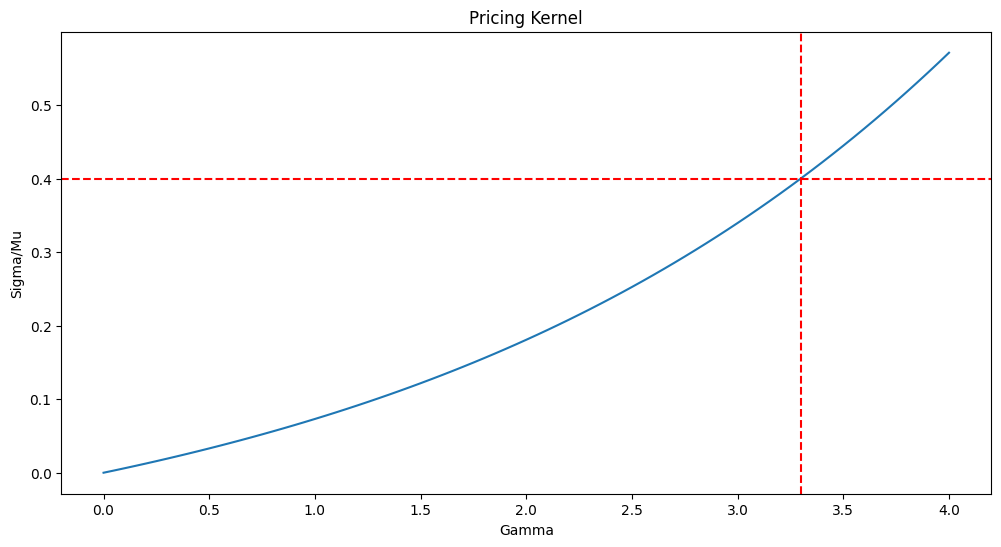

In [7]:
#x value given y is 0.4
xval = np.interp(0.4,sigma_over_mu,gamma_list)

plt.figure(figsize = (12, 6))
plt.plot(gamma_list,sigma_over_mu)
plt.axhline(y=0.4, color='r', linestyle='--')
plt.axvline(x = xval, color='r', linestyle='--')
plt.xlabel("Gamma")
plt.ylabel("Sigma/Mu")
plt.title("Pricing Kernel")

Find the smallest value of γ (in your data) for which σM/μM > 0.4. Explain (in words, without using any mathematical  equations or formulas) the economic significance of this result.

In [8]:
np.interp(0.4,sigma_over_mu,gamma_list)

3.2976803978060114

The smallest value of γ for which σM/μM > 0.4 is 3.3 or 3.298 using interpolation.

The sharpe ratio for the U.S stock market is 0.4. Gamma represents the coefficient of relative risk aversion.

The pricing kernel plays a crucial role in asset pricing, serving as a stochastic discount factor that links the initial price of an asset to its final value. Two essential conditions for this asset-pricing formula are that the investor's utility function must be strictly increasing and concave, signifying that individuals have a preference for more wealth and are risk-averse. The pricing kernel also reflects the investor's intertemporal marginal rate of substitution (IMRS), indicating the rate at which they are willing to trade present consumption for future consumption. In essence, investors shift between their initial consumption and investment in final consumption to equalize the marginal benefit, optimizing their utility and risk preferences over time.

The Hansen-Jagannathan (H-J) establishes a relationship between the pricing kernel and the risk-return trade-off in financial markets. It states that the volatility ratio of the pricing kernel, which measures the level of risk in the economy, cannot be lower than the highest Sharpe ratio observed across all available portfolios. The Sharpe ratio, a measure of risk-adjusted return, for the U.S. stock market, is typically around 0.4, indicating that investors require a 0.4% excess return for each unit of risk they bear. Therefore, according to the H-J bound, the pricing kernel's volatility ratio must be at least 0.4. This requirement implies that the pricing kernel, must exhibit a certain level of volatility to be consistent with the observed risk-return trade-off in the market, emphasizing the importance of risk assessment and compensation in financial decision-making.

In the power utility of consumption, it assumes a constant coefficient of relative risk aversion (Gamma), it's d optimal consumption growth follows a lognormal distribution, the volatility ratio of the pricing kernel closely approximates the product of Gamma and the volatility of consumption growth. This suggests that Gamma can be viewed as a magnifier of the volatility of consumption growth. It amplifies the impact of changes in the riskiness of consumption on the pricing kernel, highlighting the role of an individual's risk aversion in shaping their investment decisions and risk perceptions in financial markets.

If we consider a Sharpe ratio of 0.4, which represents the risk-adjusted return for the post-war U.S. economy, and a relatively low volatility of consumption growth (2%), the implied level of relative risk aversion (gamma) would need to be unreasonably high, at least 20, to explain the observed equity risk premium. Such a high degree of risk aversion appears unrealistic for typical investors. Ane possible explanation for this puzzle is that the models may not fully account for the true risk in the economy. This is particularly relevant during periods of great economic disruption caused by rare disasters. The volatility and skewness of consumption growth might be understated in these models, especially during times of extreme events
.The random variable v, associated with the occurrence of rare disasters, has a significant influence on optimal consumption growth. When a rare disaster happens, with a probability pi, its effect on optimal consumption growth is represented as the natural logarithm of phi, indicating the fraction of optimal consumption that individuals set aside or save to address the consequences of such an event. However, in cases where a rare disaster does not occur, with a probability of 1 - pi, the variable v has no impact on optimal consumption growth. Historical data from major 20th-century disasters suggests that the probability of such rare disasters is relatively low, estimated at 1.7%. When they do occur, the effect on optimal consumption growth is approximated as the natural logarithm of 0.65. This information provides a quantitative basis for modeling and understanding how individuals adapt their consumption behavior and financial decisions in response to the occurrence or non-occurrence of rare, significant events.

The findings from this assignment suggest that the smallest Gamma, or coefficient of relative risk aversion, required to meet the Hansen-Jagannathan (H-J) bound, where the volatility ratio of the Pricing Kernel exceeds the Sharpe Ratio of 0.4, is 3.3. This value represents a reasonable degree of relative risk aversion for investors. One key factor influencing this result is the incorporation of rare disasters into the analysis. These rare disasters significantly enhance the volatility and introduce negative skewness into optimal consumption growth, thereby making the financial landscape more uncertain and riskier. As a consequence, the presence of rare disasters implies that only a relatively small level of risk aversion, represented by Gamma, is needed to align the Pricing Kernel's volatility with the observed Sharpe Ratio, as investors are already contending with increased uncertainty and downside risk due to the rare disaster events. This highlights the role of accounting for extreme events and their impact on financial risk and risk aversion in economic modeling and investment decision-making. 


Please submit all relevant results (including graphs and qualitative discussion of economic significance) as an Adobe PDF file to Homework 5 before end of Sunday, 22 Oct 2023.